Data load, set your target and unsused_features

train data and valida data would be 75% and 25% of train data.

In [3]:
from torch import nn
import torch
from torch import tensor 
from torch.autograd import Variable
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
from sklearn.metrics import roc_auc_score

train= pd.read_csv('output.csv')
#df = pd.read_csv('./data/my.nih.norm.csv')
#df1 = pd.read_csv('./data/abcd_tbss01.csv')


In [5]:
data_all=train[train['GGA gap'].isnull() ==False]

In [6]:

dataset=data_all.fillna(0).reset_index(drop=True)

In [7]:
dataset

,Material,ICSD number,GGA gap,HSE gap,Atomic mass,Atomic no,Atomic orbitals_1s,Atomic orbitals_2s,Atomic orbitals_2p,Atomic orbitals_3s,...,Min oxidation state,Ionic radii hs_2,Ionic radii hs_3,Ionic radii hs_4,Ionic radii ls_2,Ionic radii ls_3,Ionic radii ls_4,Ionic radii ls_5,Ionic radii ls_6,Ionic radii ls_7
0,Ca,168757,0,0.000000,40.078000,20.0,-143.935181,-15.046905,-12.285376,-1.706331,...,0.0,0.000,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0
1,Ni,76668,0,0.000000,58.693400,28.0,-297.870824,-35.312112,-30.868027,-3.950717,...,0.0,0.000,0.74,0.00,0.83,0.700,0.62,0.0,0.0,0.0
2,S,38263,1.975665,3.067626,32.065000,16.0,-87.789937,-7.699940,-5.751257,-0.630912,...,0.0,0.000,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0
3,Se,86375,1.479159,2.299414,78.960000,34.0,-451.300258,-57.311948,-51.514388,-7.547186,...,0.0,0.000,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0
4,C,193439,0,0.000000,12.010700,6.0,-9.947718,-0.500866,-0.199186,0.000000,...,0.0,0.000,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18233,Co1F1H4Na1O6S1,169111,3.202057,4.974672,58.933195,27.0,-275.616639,-32.379758,-28.152095,-3.651812,...,0.0,0.885,0.75,0.67,0.79,0.685,0.00,0.0,0.0,0.0
18234,C2H6K1N4O4P1,424131,5.238256,6.872532,12.010700,6.0,-9.947718,-0.500866,-0.199186,0.000000,...,0.0,0.000,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0
18235,B2Be2Ca1F1K1O6,183886,5.256318,7.025251,10.811000,5.0,-6.564347,-0.344701,-0.136603,0.000000,...,0.0,0.000,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0
18236,C8Cr1H12N2O2S2,250698,1.989884,3.025600,12.010700,6.0,-9.947718,-0.500866,-0.199186,0.000000,...,0.0,0.000,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0


In [39]:
GGA_class=[]
for i in dataset['GGA gap'] :
    #print(i)
    if i != '0':
        print(i)
        GGA_class.append(1)
    else:
        GGA_class.append(0)

1.975665
1.479159
0.101161
3.011296
8.622969
3.35301
0.253771
7.263139
2.176846
18.025458
11.635997
2.251416
2.342096
6.985543
1.40109
12.652518
12.628631
8.617004
0.960467
1.171963
1.302616
2.456708
17.75823
2.425486
2.448508
0.350219
7.223685
1.72365
7.648339
0.510708
2.357772
6.922957
6.915962
1.466899
2.063564
2.2416
0.990355
2.348868
2.304864
2.730025
0.613106
0.601374
4.123981
0.533152
2.183681
1.429573
1.559126
1.348781
0.319598
2.223275
1.892745
5.658286
0.590555
0.277618
1.303547
0.924117
1.413891
2.02275
7.989564
2.030352
1.66379
3.755732
0.607366
0.384983
3.137296
15.365507
2.199261
3.621361
0.47798
6.754574
7.615026
0.113911
1.104804
2.391958
2.379902
1.610331
3.204417
0.8593
1.097112
9.118918
3.430363
1.193382
2.338541
3.092446
0.234227
1.958677
1.252223
0.052264
1.889388
1.838687
0.19797
0.13966
5.133896
0.073322
0.529297
4.745027
1.250968
0.627923
4.933235
1.352438
3.778109
0.59539
3.877181
0.503701
0.933836
1.468394
0.516326
0.175435
3.449466
0.471109
3.995082
0.71064
2

In [38]:
dataset['GGA gap'] = dataset

0               0
1               0
2        1.975665
3        1.479159
4               0
           ...   
18233    3.202057
18234    5.238256
18235    5.256318
18236    1.989884
18237    1.497389
Name: GGA gap, Length: 18238, dtype: object

In [40]:
dataset['GGA_class']= GGA_class

In [41]:
dataset

,Material,ICSD number,GGA gap,HSE gap,Atomic mass,Atomic no,Atomic orbitals_1s,Atomic orbitals_2s,Atomic orbitals_2p,Atomic orbitals_3s,...,Ionic radii hs_3,Ionic radii hs_4,Ionic radii ls_2,Ionic radii ls_3,Ionic radii ls_4,Ionic radii ls_5,Ionic radii ls_6,Ionic radii ls_7,GGA_class,Set
0,Ca,168757,0,0.000000,40.078000,20.0,-143.935181,-15.046905,-12.285376,-1.706331,...,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0,0,train
1,Ni,76668,0,0.000000,58.693400,28.0,-297.870824,-35.312112,-30.868027,-3.950717,...,0.74,0.00,0.83,0.700,0.62,0.0,0.0,0.0,0,train
2,S,38263,1.975665,3.067626,32.065000,16.0,-87.789937,-7.699940,-5.751257,-0.630912,...,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0,1,valid
3,Se,86375,1.479159,2.299414,78.960000,34.0,-451.300258,-57.311948,-51.514388,-7.547186,...,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0,1,train
4,C,193439,0,0.000000,12.010700,6.0,-9.947718,-0.500866,-0.199186,0.000000,...,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0,0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18233,Co1F1H4Na1O6S1,169111,3.202057,4.974672,58.933195,27.0,-275.616639,-32.379758,-28.152095,-3.651812,...,0.75,0.67,0.79,0.685,0.00,0.0,0.0,0.0,1,train
18234,C2H6K1N4O4P1,424131,5.238256,6.872532,12.010700,6.0,-9.947718,-0.500866,-0.199186,0.000000,...,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0,1,train
18235,B2Be2Ca1F1K1O6,183886,5.256318,7.025251,10.811000,5.0,-6.564347,-0.344701,-0.136603,0.000000,...,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0,1,train
18236,C8Cr1H12N2O2S2,250698,1.989884,3.025600,12.010700,6.0,-9.947718,-0.500866,-0.199186,0.000000,...,0.00,0.00,0.00,0.000,0.00,0.0,0.0,0.0,1,test


In [45]:



if "Set" not in dataset.columns:
    dataset["Set"] = np.random.choice(["train", "valid", "test"], p =[.8, .1, .1], size=(dataset.shape[0],))

train_indices = dataset[dataset.Set=="train"].index
valid_indices = dataset[dataset.Set=="valid"].index
test_indices = dataset[dataset.Set=="test"].index

In [46]:
target = 'GGA_class'
unused_feat = ['Material', 'Set', 'GGA gap', 'HSE gap']
features = [ col for col in train.columns if col not in unused_feat + [target]] 

In [49]:
X_train = dataset[features].values[train_indices]
y_train = dataset[target].values[train_indices]
X_valid = dataset[features].values[valid_indices]
y_valid = dataset[target].values[valid_indices]
X_test = dataset[features].values[test_indices]
y_test = dataset[target].values[test_indices]

print("X_train.shape: ", X_train.shape)
print("y_train.shape: ",y_train.shape)
print("X_valid.shape: ", X_valid.shape)
print("y_valid.shape: ",y_valid.shape)
print("X_test.shape: ", X_test.shape)
print("y_test.shape: ",y_test.shape)

X_train.shape:  (14675, 114)
y_train.shape:  (14675,)
X_valid.shape:  (1764, 114)
y_valid.shape:  (1764,)
X_test.shape:  (1799, 114)
y_test.shape:  (1799,)


In [50]:
clf = TabNetClassifier()
clf.fit(X_train, y_train, X_valid, y_valid, patience=5, batch_size=256, max_epochs=200)
preds_acc = clf.predict(X_test)
preds_prob = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds_prob[:,0], y_true=y_test)

Device used : cuda
Will train until validation stopping metric hasn't improved in 5 rounds.
---------------------------------------
| EPOCH |  train  |   valid  | total time (s)
| 1     | 0.64450 |  0.63953 |   2.7       
| 2     | 0.72511 |  0.71792 |   5.3       
| 3     | 0.73518 |  0.74496 |   7.9       
| 4     | 0.73927 |  0.76278 |   10.6      
| 5     | 0.74611 |  0.76130 |   13.3      
| 6     | 0.75521 |  0.77149 |   16.2      
| 7     | 0.75765 |  0.76965 |   18.8      
| 8     | 0.75843 |  0.76820 |   21.4      
| 9     | 0.76138 |  0.77594 |   24.1      
| 10    | 0.76123 |  0.78057 |   26.7      
| 11    | 0.76424 |  0.76891 |   29.4      
| 12    | 0.76142 |  0.77362 |   32.0      
| 13    | 0.76387 |  0.77294 |   34.7      
| 14    | 0.76699 |  0.77497 |   37.3      
| 15    | 0.76610 |  0.78368 |   39.9      
| 16    | 0.76848 |  0.77723 |   42.4      
| 17    | 0.76797 |  0.78090 |   45.0      
| 18    | 0.76815 |  0.78177 |   47.6      
| 19    | 0.76875 |  0.77426 |

In [ ]:
# Augmented
import torch
import itertools
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
from tqdm.notebook import tqdm
# Store maximum auc
max_auc = 0
# Store maximum hypterparameter set
max_hy = []
# define hyperparameter space
n_ = [4,8,16]
lr_ = [2e-2, 1e-2, 2e-3]
w_ = [0.01, 0.001]
g_ = [0.95, 0.99, 0.9]
ss_ = [10, 20, 30]
all_ = [n_, lr_, w_, g_, ss_]
h_space = [s for s in itertools.product(*all_)]
# Start training


for hy in tqdm(h_space):
    clf = TabNetClassifier(n_a = hy[0],
                           n_d = hy[0],
                           optimizer_params = dict(lr=hy[1], weight_decay=hy[2]),
                           scheduler_params={"step_size":hy[4], "gamma":hy[3]},
                           scheduler_fn=torch.optim.lr_scheduler.StepLR,
                           verbose=0
                           )
    clf.fit(X_train, y_train, X_valid, y_valid, patience=50, batch_size=256, max_epochs=200)
    preds_acc = clf.predict(X_test)
    preds_prob = clf.predict_proba(X_test)
    test_auc = roc_auc_score(y_score=preds_prob[:,1], y_true=y_test)
    test_acc = accuracy_score(preds_acc, y_test)
    
    print("FINAL TEST SCORE", test_auc, test_acc)
    if test_auc>max_auc:
        max_hy = hy
        max_auc = test_auc


Device used : cuda
FINAL TEST SCORE 0.7640052675402298 0.6992773763201778
Device used : cuda
FINAL TEST SCORE 0.7533186258109471 0.6998332406892718
Device used : cuda
FINAL TEST SCORE 0.7533186258109471 0.6998332406892718
Device used : cuda
FINAL TEST SCORE 0.7612293694296517 0.6998332406892718
Device used : cuda
FINAL TEST SCORE 0.761137552228894 0.7015008337965536
Device used : cuda
FINAL TEST SCORE 0.7533186258109471 0.6998332406892718
Device used : cuda
FINAL TEST SCORE 0.7738881943204144 0.708171206225681
Device used : cuda
FINAL TEST SCORE 0.7593181881070312 0.6853807670928294
Device used : cuda
FINAL TEST SCORE 0.7533186258109471 0.6998332406892718
Device used : cuda
FINAL TEST SCORE 0.7823693365767025 0.7126181211784325
Device used : cuda
FINAL TEST SCORE 0.7848257611394389 0.7153974430239022
Device used : cuda
FINAL TEST SCORE 0.7816033547238064 0.7231795441912173
Device used : cuda
FINAL TEST SCORE 0.7794758369829622 0.7270705947748749
Device used : cuda
FINAL TEST SCORE 0.77

In [ ]:
hy = max_hy
clf = TabNetClassifier(n_a = hy[0],
                           n_d = hy[0],
                           optimizer_params = dict(lr=hy[1], weight_decay=hy[2]),
                           scheduler_params={"step_size":hy[4], "gamma":hy[3]},
                           scheduler_fn=torch.optim.lr_scheduler.StepLR,
                           verbose=0
                           )
clf.fit(X_train, y_train, X_valid, y_valid, patience=50, batch_size=256, max_epochs=200)
preds_acc = clf.predict(X_test)
preds_prob = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds_prob[:,1], y_true=y_test)
test_acc = accuracy_score(preds_acc, y_test)
print("max_hy = " ,hy)
print("FINAL TEST SCORE", test_auc, test_acc)
print("Valid score: {}".format(-clf.best_cost))


In [ ]:
def rocvis(true , prob , label ) :
    from sklearn.metrics import roc_curve
    if type(true[0]) == str :
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        true = le.fit_transform(true)
    else :
        pass
    fpr, tpr, thresholds = roc_curve(true, prob)
    plt.plot(fpr, tpr, marker='.', label = label  )

target_name = 'GGA'
plt.plot([0, 1], [0, 1], linestyle='--')
rocvis(y_test , preds_prob[:,1] , f"AUC:{round(test_auc, 4)}")

plt.legend(fontsize = 20)
plt.title(f'{target_name}_test', fontsize= 30)
plt.tight_layout()
plt.savefig(f'{target_name}_ROC.png')
plt.show()        


In [ ]:
importance =clf.feature_importances_
plt.plot(importance)

labels_importance=importance.argsort()[::-1]

importance_sort = np.sort(importance)[::-1]

feat_name_sort=train[features].columns[labels_importance]
important_features = pd.DataFrame() 


for i in range (20):
    feature = pd.DataFrame([[feat_name_sort[i],importance_sort[i]]], columns = ['feature name', 'ratio'])
    important_features=pd.concat([important_features,feature])

important_features.reset_index(drop=True)

In [ ]:
important_features.reset_index(drop=True).to_csv("data_all_GGA.csv")

In [59]:
from sklearn.model_selection import KFold
NUM_FOLDS = 5  # you can specify your folds here

# Creating FOLDS

test_data_processed["kfold"] = -1

train_data_processed["kfold"] = -1

train_data_processed = train_data_processed.sample(frac=1,random_state=2020).reset_index(drop=True)

kf = KFold(n_splits=NUM_FOLDS)

for fold, (trn_, val_) in enumerate(kf.split(X=train_data_processed, y=train_data_processed)):
    train_data_processed.loc[val_, 'kfold'] = fold
    
train_data_processed

,Unnamed: 0,subjectkey,sex,race.ethnicity,abcd_site,lh_bankssts_area._.1,lh_caudalanteriorcingulate_area._.1,lh_caudalmiddlefrontal_area._.1,lh_cuneus_area._.1,lh_entorhinal_area._.1,...,wm.rh.transversetemporal._.18,wm.rh.insula._.18,Left.UnsegmentedWhiteMatter._.18,Right.UnsegmentedWhiteMatter._.18,lhCerebralWhiteMatterVol._.18,rhCerebralWhiteMatterVol._.18,CerebralWhiteMatterVol._.18,MaskVol._.18,EstimatedTotalIntraCranialVol._.18,kfold
0,5258,NDAR_INVH1DJ48J1,1,1,11,0.995173,1.096158,3.477764,1.166651,-0.589630,...,-0.828231,1.227477,1.750053,1.565132,1.631344,1.573952,1.604291,1.629750,1.444491,0
1,1667,NDAR_INV57CKHLC8,1,3,3,0.038717,-0.522494,-0.909285,-1.074445,-0.685008,...,1.342644,-0.179764,-0.925164,-0.686693,-1.027205,-0.920787,-0.974965,-0.740189,-0.236888,0
2,4333,NDAR_INVDZLD38UM,2,3,10,-0.046412,-0.502593,-0.002720,0.520982,-1.867698,...,-0.698690,1.028569,-0.212771,-0.051552,-0.207165,-0.240379,-0.224018,-0.060954,-0.505478,0
3,4979,NDAR_INVG270KBWC,1,1,13,-0.552182,-0.927157,-0.900174,-1.078611,-0.704084,...,5.567552,0.719304,-0.229947,-0.250116,-0.075780,-0.025129,-0.050486,-0.846273,-0.822425,0
4,3629,NDAR_INVBLYFK2HJ,1,2,1,0.925066,-1.066467,-0.362613,-1.395197,-1.696018,...,1.167382,-0.962313,-1.103856,-1.130861,-1.167459,-1.086792,-1.128264,-1.030148,-1.191267,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7819,6538,NDAR_INVM2JLZJJ1,2,4,1,-1.077982,-1.099636,-1.599460,-0.062203,-1.629253,...,1.397678,-0.202992,-0.791601,-1.215579,-0.851700,-1.124041,-0.989011,-0.940313,-0.772565,4
7820,7159,NDAR_INVP7PFH5GK,1,3,1,1.135386,-1.683412,-1.241845,-1.366037,-0.704084,...,0.103958,-0.595878,-0.036227,-0.455683,-0.877917,-0.870463,-0.875096,-0.697011,-1.274056,4
7821,8027,NDAR_INVTYTK28UK,1,1,21,0.274075,0.810904,-0.036887,1.741504,1.174867,...,1.499279,1.518349,0.251369,0.198816,0.961198,0.994185,0.978722,1.254736,1.320461,4
7822,5325,NDAR_INVH7TVMCPN,2,1,11,-0.992853,-0.230606,-0.979897,1.270791,0.907808,...,-0.481941,0.271619,-2.229720,-2.280253,-1.149105,-1.184561,-1.168061,-0.669032,-0.308014,4


In [60]:

target='sex'
unused_feat = ['Set', 'subjectkey', 'race.ethnicity', 'abcd_site', 'Unnamed: 0']

features = [ col for col in train_data_processed.columns if col not in unused_feat + [target]] 


In [1]:
X_test = test_data_processed[features].values
Y_test = test_data_processed[target].values

def run(fold):
    df_train = train_data_processed[train_data_processed.kfold != fold]
    df_valid = train_data_processed[train_data_processed.kfold == fold]
    
    X_train = df_train[features].values
    Y_train = df_train[target].values
    
    X_valid = df_valid[features].values
    Y_valid = df_valid[target].values
    
    y_oof = np.zeros((df_valid.shape[0],len(target)))   # Out of folds validation
    
    print("--------Training Begining for fold {}-------------".format(fold+1))
    n_ = [4,8,16]
    lr_ = [2e-2, 1e-2, 5e-3, 2e-3, 1e-3, 1e-4]
    w_ = [0.01, 0.001, 0.0001]
    g_ = [0.95, 0.99, 0.9]
    ss_ = [10, 20, 30]
    all_ = [n_, lr_, w_, g_, ss_]
    h_space = [s for s in itertools.product(*all_)]
# Start training
    hy=  (4, 0.02, 0.001, 0.9, 20)
    
    clf = TabNetClassifier(n_a = hy[0],
                       n_d = hy[0],
                       optimizer_params = dict(lr=hy[1], weight_decay=hy[2]),
                       scheduler_params={"step_size":hy[4], "gamma":hy[3]},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       verbose=0
                           )
    clf.fit(X_train, Y_train, X_valid, Y_valid, patience=50, batch_size=256, max_epochs=200)
    preds_acc = clf.predict(X_test)
    preds_prob = clf.predict_proba(X_test)
    test_auc = roc_auc_score(y_score=preds_prob[:,1], y_true=Y_test)
    test_acc = accuracy_score(preds_acc, Y_test)
    print("FINAL TEST SCORE", test_auc, test_acc)

    # VISUALIZTION
    #plt.figure(figsize=(12,6))
    #plt.plot(model.history['train']['loss'])
    #plt.plot(model.history['valid']['loss'])
    
    #Plotting Metric
    #plt.plot([-x for x in model.history['train']['metric']])
    #plt.plot([-x for x in model.history['valid']['metric']])

NameError: name 'test_data_processed' is not defined

In [68]:
run(fold=0)

--------Training Begining for fold 1-------------
Device used : cuda
FINAL TEST SCORE 0.9319991637484973 0.8349514563106796


--------Training Begining for fold 1-------------
Device used : cuda
FINAL TEST SCORE 0.9319991637484973 0.8349514563106796
                       feature name     ratio
0      lhCerebralWhiteMatterVol._.9  0.201582
1            BrainSegVolNotVent._.4  0.200428
2    rh_G_temporal_middle_area._.14  0.086167
3  rh_S_oc_middle.Lunatus_area._.14  0.085094
4          rh_S_front_sup_area._.14  0.064803
--------Training Begining for fold 2-------------
Device used : cuda
FINAL TEST SCORE 0.9338640045993832 0.7812979049565661
                       feature name     ratio
0      lhCerebralWhiteMatterVol._.9  0.201582
1            BrainSegVolNotVent._.4  0.200428
2    rh_G_temporal_middle_area._.14  0.086167
3  rh_S_oc_middle.Lunatus_area._.14  0.085094
4          rh_S_front_sup_area._.14  0.064803
--------Training Begining for fold 3-------------
Device used : cuda
FINAL TEST SCORE 0.930464642241154 0.8277976494634645
                       feature name     ratio
0      lhCerebralWhiteMatterVol

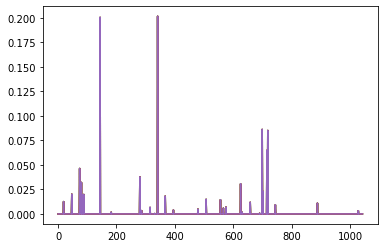

In [71]:
for i in range(NUM_FOLDS):
    run(fold = i)
    feature(5)

Do it with best hyperparameter 

find feature importance 

In [70]:
# 위에서 부터 랭킹 찾고 싶은 숫자

def feature(num):
    importance =clf.feature_importances_
    plt.plot(importance)

    labels_importance=importance.argsort()[::-1]

    importance_sort = np.sort(importance)[::-1]

    feat_name_sort=test_data_processed[features].columns[labels_importance]
    important_features = pd.DataFrame() 


    for i in range (num):
        feature = pd.DataFrame([[feat_name_sort[i],importance_sort[i]]], columns = ['feature name', 'ratio'])
        important_features=pd.concat([important_features,feature])

    print(important_features.reset_index(drop=True))
